In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

This model uses a neural network and GridSearchCV to predict share price impacts of Interest changes

# Read the CSV and Perform Basic Data Cleaning

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df_stock1 = pd.read_csv("../../static/data/cba.csv")
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last row to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]
# Drop last 3 columns Sentiment RBA FED
# N=3
# df = df_stock_less1.iloc[: , :-N]
df_stock_less1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED,CPI,CPIUS,CPIchange
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEGATIVE,5.0,5.5,69.7,168.8,2.8
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE,5.0,5.5,69.7,168.8,2.8
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE,5.0,5.5,69.7,168.8,2.8
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,POSITIVE,5.0,5.5,69.7,168.8,2.8
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE,5.0,5.5,69.7,168.8,2.8


In [5]:
df_stock_less1.shape

(5720, 13)

# Use `RBA`,`FED` and `CPI` for the X values

In [6]:
X = df_stock_less1[["RBA","FED","CPI"]]
y = df_stock_less1["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5720, 3) (5720, 1)


In [7]:
X

,RBA,FED,CPI
0,5.00,5.50,69.7
1,5.00,5.50,69.7
2,5.00,5.50,69.7
3,5.00,5.50,69.7
4,5.00,5.50,69.7
...,...,...,...
5715,0.85,1.75,125.0
5716,0.85,1.75,125.0
5717,0.85,1.75,125.0
5718,0.85,1.75,125.0


# Create a Train Test Split

In [8]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.info)

(4290, 3) (4290, 1)
(1430, 3) (1430, 1)
<bound method DataFrame.info of        RBA   FED    CPI
2275  5.25  1.00   92.4
4703  1.50  2.00  113.0
99    6.00  6.50   70.2
3984  2.00  0.25  108.0
1750  6.00  5.25   86.6
...    ...   ...    ...
905   4.75  1.25   78.6
5192  0.25  1.25  114.4
3980  2.00  0.25  108.0
235   6.25  6.50   73.1
5157  0.25  1.25  114.4

[4290 rows x 3 columns]>


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8734458082753345
Testing Score: 0.880778147857897


In [11]:
# X_train = X_train.reshape((X_train.shape[0], 1))

In [12]:
#Linear Regression Residual showing difference actual vs predicted
# residual = pd.DataFrame([model.predict(X_train),y_train,(model.predict(X_train)-y_train)])
# residual.tail

Text(0.5, 1.0, 'Residual Plot')

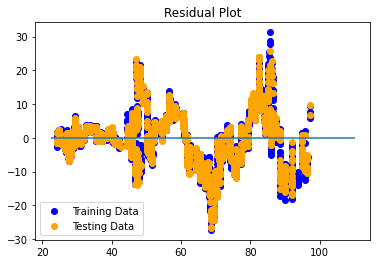

In [13]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [14]:
# Linear Regression: X_test predictions to variable
predictions = model.predict(X_test)

#### R2 Score is a very popular metric used for evaluating the performance of linear regression models. Where R2 Score is between 0 and 1, the closer to 1, the better the regression fit.
#### Use MSE or MAE when comparing two or more models, the lower the value of MSE or MAE, the better. MSE (Mean Square Error): Uses Euclidean distance to calculate the error. MSE gives the magnitude of the error only.

In [15]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 59.32072025422858, R2: 0.880778147857897


#### Lasso regression imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. It comes with a parameter, alpha , and the higher the alpha , the more feature coefficients are zero. When alpha is 0 , Lasso regression produces the same coefficients as a linear regression.

In [16]:
# LASSO model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 59.32628335931145, R2: 0.8807669672166506


In [17]:
# Ridge model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 59.3207219586471, R2: 0.8807781444323834


In [18]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 59.32723738798327, R2: 0.8807650498248056


# Hyperparameter Tuning

In [19]:
y_target = df_stock_less1["Close"]
y_target.shape

(5720,)

In [20]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_target, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4290, 3) (4290,)
(1430, 3) (1430,)


In [21]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4290, 3) (4290,)
(1430, 3) (1430,)


#### GridSearchCV and RandomizedSearchCV are techniques to evaluate models for a given hyperparameter vector using cross-validation, hence the “CV” suffix of the class name.
#### We are executing many models together is to find which machine learning model works best for this particular dataset.

In [22]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressors = [
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [24]:
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

RandomForestRegressor()
	Training time: 0.253s
	Prediction time: 0.017s
	Explained variance: 0.9918682108534205
	Mean absolute error: 1.415338705125022
	R2 score: 0.9918656523648963

DecisionTreeRegressor()
	Training time: 0.006s
	Prediction time: 0.001s
	Explained variance: 0.9917052239528029
	Mean absolute error: 1.4218811553091728
	R2 score: 0.9917031587792074

KNeighborsRegressor()
	Training time: 0.005s
	Prediction time: 0.010s
	Explained variance: 0.9899087721803503
	Mean absolute error: 1.5331695534265732
	R2 score: 0.9898939795916556

GradientBoostingRegressor()
	Training time: 0.158s
	Prediction time: 0.000s
	Explained variance: 0.9887482406509844
	Mean absolute error: 1.7751033284729665
	R2 score: 0.9887326203937874

KNeighborsRegressor()
	Training time: 0.009s
	Prediction time: 0.000s
	Explained variance: 0.9899087721803503
	Mean absolute error: 1.5331695534265732
	R2 score: 0.9898939795916556

ExtraTreesRegressor()
	Training time: 0.191s
	Prediction time: 0.025s
	Explained 

#### By comparing these results, we can quickly see that RandomForestRegressor and DecisionTreeRegressor are the best models for our data
#### Machine learning models have parameters, which are the internal coefficients set by training or optimizing the model on a training dataset.
#### Parameters are different from hyperparameters. Parameters are learned automatically; hyperparameters are set manually to help guide the learning process.

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [28]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [29]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.4167 degrees.
Accuracy = 97.50%.
Model Performance
Average Error: 1.4196 degrees.
Accuracy = 97.49%.
Improvement of -0.01%.


In [30]:
# Hyperparameter tuning has not improved accuracy significantly

In [31]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
y_test_pred = model_rfr.predict(X_test)
y_test_pred

array([65.33755577, 79.6090568 , 37.02204619, ..., 44.95986908,
       49.08143842, 83.20908662])

In [32]:
#RandomForestRegressor Residual showing difference actual vs predicted
residual_dtr = pd.DataFrame([model_rfr.predict(X_train),y_train,(model_rfr.predict(X_train)-y_train)])
residual_dtr.tail

<bound method NDFrame.tail of         0          1          2          3          4          5     \
0  33.999697  71.566967  27.004338  79.949827  46.748530  28.572912   
1  39.585526  71.910004  27.594494  81.269997  46.876026  28.644802   
2  -5.585829  -0.343037  -0.590156  -1.320170  -0.127496  -0.071890   

        6          7          8          9     ...       4280       4281  \
0  49.821266  32.084705  54.832536  25.026453  ...  75.685172  27.567884   
1  49.730560  31.927019  53.301212  25.099012  ...  77.800003  27.869005   
2   0.090706   0.157686   1.531324  -0.072559  ...  -2.114831  -0.301121   

        4282       4283       4284       4285       4286       4287  \
0  79.979271  51.180842  50.351277  26.520395  63.196983  79.949827   
1  79.040001  52.873531  50.178135  30.355534  58.990002  81.677467   
2   0.939270  -1.692689   0.173142  -3.835139   4.206981  -1.727640   

        4288       4289  
0  29.829121  63.196983  
1  30.972193  61.240002  
2  -1.143072   1.

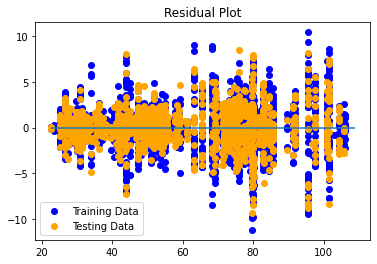

In [33]:
# Make predictions using fitted model
predictions1 = model_rfr.predict(X_test)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(model_rfr.predict(X_train), y_train - model_rfr.predict(X_train), c="blue", label="Training Data")
plt.scatter(model_rfr.predict(X_test), y_test - model_rfr.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [34]:
# Save the entire model to a HDF5 file. The '.h5' extension indicates that the model should be saved to HDF5.
# filepath = '../static/cba_model_dtr.sav'
# model_dtr.save(filepath, save_format="h5")

In [35]:
# # Save model
# import joblib
# filename = 'cba_model_rfr.sav'
# joblib.dump(model_rfr, filename)

In [36]:
import pickle
filename = 'finalcba_model_rfr.sav'
pickle.dump(model, open(filename, 'wb'))
model_in_rfr = pickle.load(open(filename, 'rb'))

In [37]:
# from joblib import dump,load
# model_in_rfr = load('cba_model_rfr.sav')

In [38]:
rba = float(4.98)
fed = float(5.87)
cpi = float(168.8)
input =40
rfr=[]

def randomforest(rba,fed,cpi):
    for i in range(0,input):
      rfr.append([rba,fed,cpi])
      np.round_(rfr,2,out = None) 
      df = pd.DataFrame(rfr, columns = ['RBA','FED',"CPI"])
      df.round(2)
      pred_rf=model_in_rfr.predict(df)
      df['Prediction'] = pred_rf
      df['Prediction'] = df['Prediction'].astype(float).round(2)
      rba+=0.01
      fed+=0.01
      cpi+=0.01
      print(df)
    my_rforest = df.to_dict(orient='records')
    for dict_value in my_rforest:
      for k, v in dict_value.items():
        dict_value[k] = round(v, 2)
    return my_rforest
# print(my_rforest)
my_rf = randomforest(rba,fed,cpi)
print(my_rf)


    RBA   FED    CPI  Prediction
0  4.98  5.87  168.8      159.08
    RBA   FED     CPI  Prediction
0  4.98  5.87  168.80      159.08
1  4.99  5.88  168.81      159.10
    RBA   FED     CPI  Prediction
0  4.98  5.87  168.80      159.08
1  4.99  5.88  168.81      159.10
2  5.00  5.89  168.82      159.12
    RBA   FED     CPI  Prediction
0  4.98  5.87  168.80      159.08
1  4.99  5.88  168.81      159.10
2  5.00  5.89  168.82      159.12
3  5.01  5.90  168.83      159.14
    RBA   FED     CPI  Prediction
0  4.98  5.87  168.80      159.08
1  4.99  5.88  168.81      159.10
2  5.00  5.89  168.82      159.12
3  5.01  5.90  168.83      159.14
4  5.02  5.91  168.84      159.16
    RBA   FED     CPI  Prediction
0  4.98  5.87  168.80      159.08
1  4.99  5.88  168.81      159.10
2  5.00  5.89  168.82      159.12
3  5.01  5.90  168.83      159.14
4  5.02  5.91  168.84      159.16
5  5.03  5.92  168.85      159.18
    RBA   FED     CPI  Prediction
0  4.98  5.87  168.80      159.08
1  4.99  5.88  1

In [39]:
rba = float(4.98)
fed = float(5.87)
cpi = float(168.8)
def rforest(rba,fed,cpi):
    dtr =[[rba,fed,cpi]]
    df = pd.DataFrame (dtr, columns = ['RBA','FED',"CPI"])
    pred_dtr=model_in_rfr.predict(df)
    df['Prediction'] = pred_dtr
    print(df)
rforest(rba,fed,cpi)


    RBA   FED    CPI  Prediction
0  4.98  5.87  168.8  159.083039


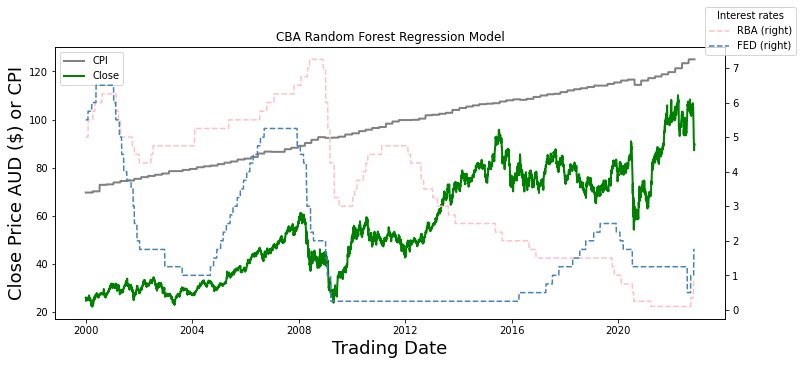

In [51]:
x = np.arange(2000,2024,4)
ax = df_stock_less1.plot(y=["CPI","Close"], figsize=(12, 5),color=['grey','green'],linewidth=2)
df_stock_less1.plot(y=["RBA","FED"],secondary_y=True, ax=ax,color=['pink','steelblue'],linestyle='dashed')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=-4, title="Interest rates")
ax.legend(loc='upper left')
ax.set_xticks([0,1000,2000,3000,4000,5000])
ax.set_xticklabels(x, rotation=0)
ax.set_title('CBA Random Forest Regression Model')
ax.set_xlabel('Trading Date', fontsize=18)
ax.set_ylabel('Close Price AUD ($) or CPI', fontsize=18)
plt.savefig('../../static/data/images/cba_tree.png')